# Bolsa Tool

**Streamlit:** https://docs.streamlit.io/

**Datareader:** https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

**Ciberpunk:** https://github.com/dhaitz/mplcyberpunk

**Prophet:** https://facebook.github.io/prophet/docs/quick_start.html

Crearemos una aplicación para poder ver acciones en bolsa

Importamos librerías

In [3]:
import streamlit as st
import pandas as pd
import pandas_datareader.data as web
import datetime
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mplcyberpunk
import numpy as np
from prophet import Prophet
from datetime import datetime, timedelta


In [4]:
"""pip install pandas-datareader
pip install mplcyberpunk
python -m pip install prophet
conda install -c conda-forge prophet (recomendada por él)
"""

'pip install pandas-datareader\npip install mplcyberpunk\npython -m pip install prophet\nconda install -c conda-forge prophet (recomendada por él)\n'

In [5]:
#%pip install yfinance


In [6]:
import yfinance as yf

# crear lista de acciones
portfolio = ['APPL', 'MSFT', 'TSLA', 'META', 'GOOG', 'NFLX', 'SPOT', '^GSPC', '^IXIC']
# Obtener datos históricos de una acción
data = yf.download('MSFT', start='2021-01-01', end=None)

data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,211.224289,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,211.428070,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,205.945908,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,211.806488,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,213.096985,22956200
...,...,...,...,...,...,...
2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000
2024-06-27,452.179993,456.170013,451.769989,452.850006,452.850006,14806300
2024-06-28,453.070007,455.380005,446.410004,446.950012,446.950012,28362300


# Yahoo Finance

In [7]:

# get all stock info
btc = yf.Ticker('BTC-USD')
btc

yfinance.Ticker object <BTC-USD>

In [8]:
# get all stock info
msft = yf.Ticker('MSFT')
msft

yfinance.Ticker object <MSFT>

In [9]:
info = yf.Ticker(f'MSFT')
hist = info.history()
market_value_per_share = hist.Close[0]
income_stmt = info.income_stmt.T
EPS = income_stmt['Basic EPS'][0]
per = (market_value_per_share/EPS)
print(f'El PER es {per}')
print(f'El market_value_per_share es {market_value_per_share}')
print(f'El EPS es {EPS}')


El PER es 42.543208746262536
El market_value_per_share es 413.5199890136719
El EPS es 9.72


In [10]:
#función del cálculo del PER
def per_ratio(data):
    info = yf.Ticker(f'{stock}')
    hist = info.history()
    market_value_per_share = hist.Close[0]
    income_stmt = info.income_stmt.T
    EPS = income_stmt['Basic EPS'][0]
    per = market_value_per_share/EPS
    print(f'El PER es {per}')

In [34]:
import plotly.express as px
import plotly.graph_objects as go

# Crear el gráfico de dispersión
fig = px.line(data, x=data.index, y=data.columns, color_discrete_sequence=px.colors.qualitative.Plotly)

# Personalizar el gráfico para un estilo cyberpunk
fig.update_traces(marker=dict(size=15, line=dict(width=2, color='rgba(255, 255, 255, 0.8)')))

# Ajustar el fondo y los elementos visuales
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title={
        'text': "Precio de la Ación",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='white'),
    yaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='white'),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='white'
        ),
        bgcolor='black',
        bordercolor='white',
        borderwidth=2
    )
)

# Añadir el efecto de resplandor mediante líneas adicionales
for i in range(1, 5):
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data.columns,
        mode='markers',
        marker=dict(
            size=15 + i,
            line=dict(width=2, color=f'rgba(0, 255, 255, {0.2 / i})')
        ),
        hoverinfo='skip',
        showlegend=False
    ))

# Mostrar el gráfico
fig.show()


In [31]:
# Crear el gráfico de dispersión
fig = px.line(data, x=data.index, y=data.columns, color_discrete_sequence=px.colors.qualitative.Plotly)

# Personalizar el gráfico para un estilo cyberpunk
#fig.update_traces(marker=dict(size=15, line=dict(width=2, color='rgba(255, 255, 255, 0.8)')))

# Mostrar el gráfico
fig.show()

In [12]:
# Using plotly.express
import plotly.express as px


# crear lista de acciones
portfolio = ['APPL', 'MSFT', 'TSLA', 'META', 'GOOG', 'NFLX', 'SPOT', '^GSPC', '^IXIC', 'BTC-USD']
# Obtener datos históricos de una acción
data = yf.download('BTC-USD', start='2021-01-01', end=None)

data


fig = px.line(data, x=data.index, y=data.columns,
              color_discrete_sequence=px.colors.qualitative.Plotly,
              title='Precio de la Ación')
# Personalización del gráfico
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title={
        'text': "Precio de la Acción",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        showgrid=True,          # Mostrar la cuadrícula en el eje x
        gridcolor='gray',       # Color de las líneas de cuadrícula
        gridwidth=0.5,          # Ancho de las líneas de cuadrícula
        linecolor='white'       # Color de la línea del eje
    ),
    yaxis=dict(
        showgrid=True,          # Mostrar la cuadrícula en el eje y
        gridcolor='gray',       # Color de las líneas de cuadrícula
        gridwidth=0.5,          # Ancho de las líneas de cuadrícula
        linecolor='white'       # Color de la línea del eje
    )
)

# Mostrar el gráfico
fig.show()

[*********************100%***********************]  1 of 1 completed


In [13]:
# Crear el gráfico inicial
def plot_open_close(data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y='Open', color='yellow', linewidth=1, label='Open')
    sns.lineplot(data=data, x=data.index, y='Close', color='red', linewidth=1, label='Close')
    sns.lineplot(data=data, x=data.index, y='High', color='green', linewidth=1, label='High')
    sns.lineplot(data=data, x=data.index, y='Low', color='dodgerblue', linewidth=1, label='Low')
    mplcyberpunk.add_glow_effects()
    plt.title(f'Precio de Apertura y Cierre para accion')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True,color='gray', linestyle='-', linewidth=0.4)
    return plt

In [14]:
# get historical market data
hist = msft.history(period="1mo")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-03 00:00:00-04:00,415.529999,416.429993,408.920013,413.519989,17484700,0.0,0.0
2024-06-04 00:00:00-04:00,412.429993,416.440002,409.679993,416.070007,14348900,0.0,0.0
2024-06-05 00:00:00-04:00,417.809998,424.079987,416.299988,424.010010,16988000,0.0,0.0
2024-06-06 00:00:00-04:00,424.010010,425.309998,420.579987,424.519989,14861300,0.0,0.0
2024-06-07 00:00:00-04:00,426.200012,426.279999,423.000000,423.850006,13621700,0.0,0.0


In [15]:
# Crear el gráfico
def plot_open_close(data):
    plt.figure(figsize=(12,12))
    sns.lineplot(data=data, x=data.index, y='Open', color='yellow', linewidth=1, label='Open')
    sns.lineplot(data=data, x=data.index, y='Close', color='red', linewidth=1, label='Close')
    sns.lineplot(data=data, x=data.index, y='High', color='green', linewidth=1, label='High')
    sns.lineplot(data=data, x=data.index, y='Low', color='dodgerblue', linewidth=1, label='Low')
    #sns.lineplot(data=data, x=data.index, y='Volume', color='white', linewidth=1, label='Volume')
    mplcyberpunk.add_glow_effects()
    plt.title(f'Precio de Apertura y Cierre para MSFT')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    #plt.legend()
    #plt.grid(True)
    return plt

In [16]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1720022632,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 459.3,
 'fiftyTwoWeekHigh': 460.78,
 'fiftyTwoWeekLow': 457.88,
 'regularMarketDayHigh': 460.78,
 'regularMarketDayLow': 457.88,
 'regularMarketVolume': 5013657,
 'chartPreviousClose': 413.52,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1719993600,
   'end': 1720013400,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1720013400,
   'end': 1720026000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1720026000,
   'end': 1720051200,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10

In [17]:
# show actions
msft.actions

,Dividends,Stock Splits
Date,,


In [18]:
#show dividends
msft.dividends


Series([], Name: Dividends, dtype: float64)

In [19]:
#show splits
msft.splits

Series([], Name: Stock Splits, dtype: float64)

In [20]:
#show capital gains
msft.capital_gains  # only for mutual funds & etfs

[]

In [21]:
# show share count
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
                                ...    
2024-06-27 00:00:00-04:00    7432309760
2024-06-28 00:00:00-04:00    7432309760
2024-06-29 00:00:00-04:00    7432309760
2024-07-02 00:00:00-04:00    7432309760
2024-07-03 00:00:00-04:00    7432309760
Length: 208, dtype: int64

In [22]:
# show financials by year:
# - income statement
msft.income_stmt


,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Tax Effect Of Unusual Items,-2850000.0,43420000.0,180160797.164637,4760000.0
Tax Rate For Calcs,0.19,0.13,0.138266,0.17
Normalized EBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0


In [23]:
# show financials by quarterly
# - income statement
msft.quarterly_income_stmt.head()

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-33660000.0,-29160000.0,-20700000.0,20855987.382214,30780000.0,NaN
Tax Rate For Calcs,0.18,0.18,0.18,0.187892,0.19,NaN
Normalized EBITDA,33741000000.0,33556000000.0,31845000000.0,28972000000.0,26556000000.0,NaN
Total Unusual Items,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN
Total Unusual Items Excluding Goodwill,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN


In [24]:
# - balance sheet
msft.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
Other Short Term Investments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


In [25]:
# - balance sheet by quarterly
msft.quarterly_balance_sheet.T.columns

Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities',

In [26]:
# - cash flow statement
msft.cashflow.head()

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,45234000000.0
Repurchase Of Capital Stock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0
Repayment Of Debt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0
Issuance Of Debt,NaN,NaN,NaN,0.0
Issuance Of Capital Stock,1866000000.0,1841000000.0,1693000000.0,1343000000.0


In [27]:
# - cash flow statement
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,20965000000.0,9118000000.0,20666000000.0,19827000000.0,17834000000.0,NaN
Repurchase Of Capital Stock,-4213000000.0,-4000000000.0,-4831000000.0,-5704000000.0,-5509000000.0,NaN
Repayment Of Debt,-11589000000.0,-2916000000.0,-1500000000.0,-1000000000.0,0.0,NaN
Issuance Of Debt,6352000000.0,10773000000.0,25765000000.0,NaN,0.0,0.0
Issuance Of Capital Stock,522000000.0,261000000.0,685000000.0,512000000.0,536000000.0,NaN
Capital Expenditure,-10952000000.0,-9735000000.0,-9917000000.0,-8943000000.0,-6607000000.0,NaN
End Cash Position,19634000000.0,17305000000.0,80452000000.0,34704000000.0,26562000000.0,NaN
Beginning Cash Position,17305000000.0,80452000000.0,34704000000.0,26562000000.0,15646000000.0,NaN
Effect Of Exchange Rate Changes,-80000000.0,72000000.0,-99000000.0,-81000000.0,29000000.0,NaN
Changes In Cash,2409000000.0,-63219000000.0,45847000000.0,8223000000.0,10887000000.0,NaN


In [28]:
msft.get_income_stmt().head(10)

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
TaxEffectOfUnusualItems,-2850000.0,43420000.0,180160797.164637,4760000.0
TaxRateForCalcs,0.19,0.13,0.138266,0.17
NormalizedEBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0
TotalUnusualItems,-15000000.0,334000000.0,1303000000.0,28000000.0
TotalUnusualItemsExcludingGoodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
ReconciledDepreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
ReconciledCostOfRevenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0


In [29]:
deuda = msft.cashflow.T
deuda

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Changes In Account Receivables,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2023-06-30,59475000000.0,-22245000000.0,-2750000000.0,NaN,1866000000.0,-28107000000.0,34704000000.0,13931000000.0,-194000000.0,20967000000.0,...,-4087000000.0,9611000000.0,-6059000000.0,-6059000000.0,13861000000.0,13861000000.0,13861000000.0,196000000.0,NaN,72361000000.0
2022-06-30,65149000000.0,-32696000000.0,-9023000000.0,NaN,1841000000.0,-23886000000.0,13931000000.0,14224000000.0,-141000000.0,-152000000.0,...,-6834000000.0,7502000000.0,-5702000000.0,-5702000000.0,14460000000.0,14460000000.0,14460000000.0,-409000000.0,NaN,72738000000.0
2021-06-30,56118000000.0,-27385000000.0,-3750000000.0,NaN,1693000000.0,-20622000000.0,14224000000.0,13576000000.0,-29000000.0,677000000.0,...,-6481000000.0,6118000000.0,-150000000.0,-150000000.0,11686000000.0,11686000000.0,11686000000.0,-1249000000.0,NaN,61271000000.0
2020-06-30,45234000000.0,-22968000000.0,-5518000000.0,0.0,1343000000.0,-15441000000.0,13576000000.0,11356000000.0,-201000000.0,2421000000.0,...,-2577000000.0,5289000000.0,11000000.0,11000000.0,12796000000.0,12796000000.0,12796000000.0,-219000000.0,-219000000.0,44281000000.0


In [30]:
debt_columns = deuda.filter(like='Debt')
debt_columns['Total Debt'] = debt_columns.sum(axis=1)
debt_columns['Total Debt'] = debt_columns['Total Debt'].abs()
plt.figure(figsize=(12,12))
sns.lineplot(data=data, x=data.index, y='EBITDA', color='dodgerblue', linewidth=1, label='EBITDA')
sns.lineplot(data=debt_columns, x=data.index, y='Total Debt', color='red', linewidth=1, label='Total Debt')
#sns.lineplot(data=deuda, x=data.index, y='Long Term Debt Payments', color='yellow', linewidth=1, label='Long Term Debt Payments')
mplcyberpunk.add_glow_effects()
plt.title(f'Comparación entre EBITDA y Long Term Debt Payments de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Millones de $')
plt.show()


C:\Users\GAMM\AppData\Local\Temp\ipykernel_22556\2713343297.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GAMM\AppData\Local\Temp\ipykernel_22556\2713343297.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Could not interpret value `EBITDA` for parameter `y`

<Figure size 1200x1200 with 0 Axes>

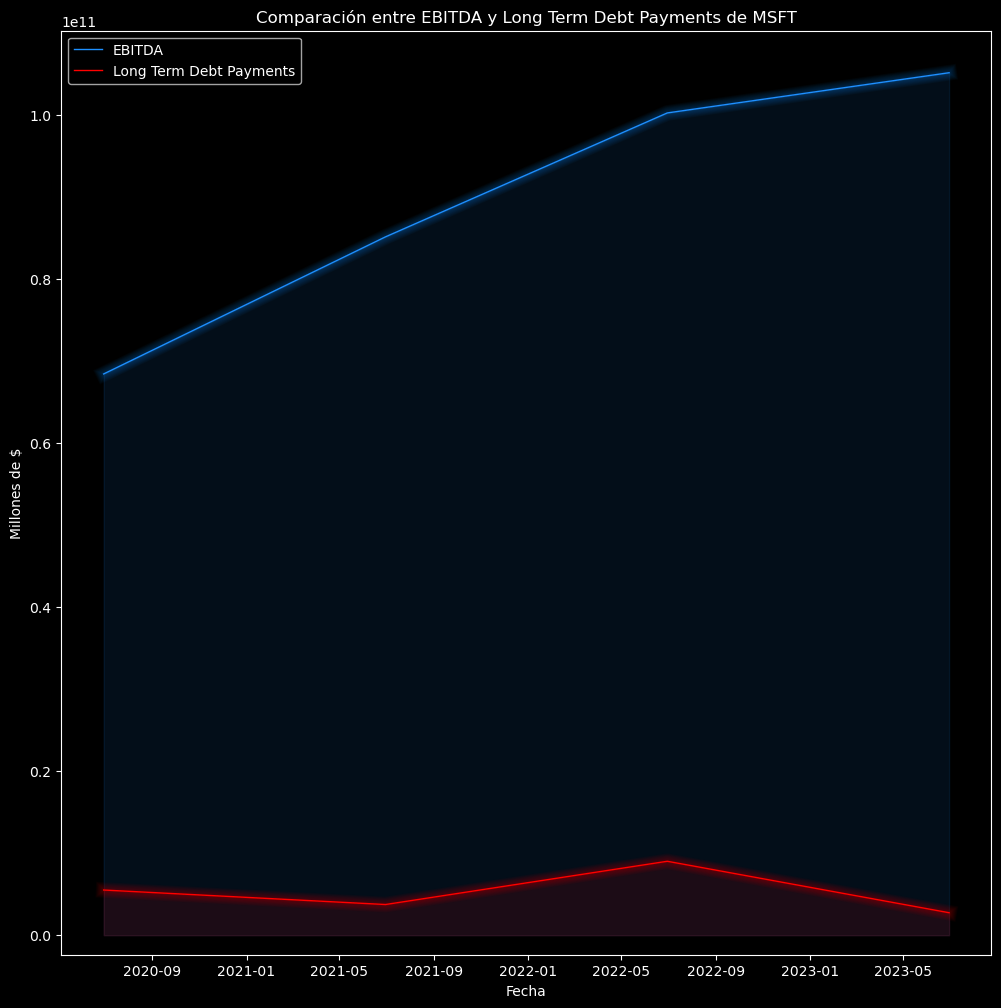

In [ ]:
data = msft.get_income_stmt().T
deuda = msft.cashflow.T
# Convertir los pagos de deuda a largo plazo en valores positivos
deuda['Long Term Debt Payments'] = deuda['Long Term Debt Payments'].abs()
plt.figure(figsize=(12,12))
sns.lineplot(data=data, x=data.index, y='EBITDA', color='dodgerblue', linewidth=1, label='EBITDA')
sns.lineplot(data=deuda, x=data.index, y='Long Term Debt Payments', color='red', linewidth=1, label='Long Term Debt Payments')
#sns.lineplot(data=deuda, x=data.index, y='Long Term Debt Payments', color='yellow', linewidth=1, label='Long Term Debt Payments')
mplcyberpunk.add_glow_effects()
plt.title(f'Comparación entre EBITDA y Long Term Debt Payments de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Millones de $')
plt.show()


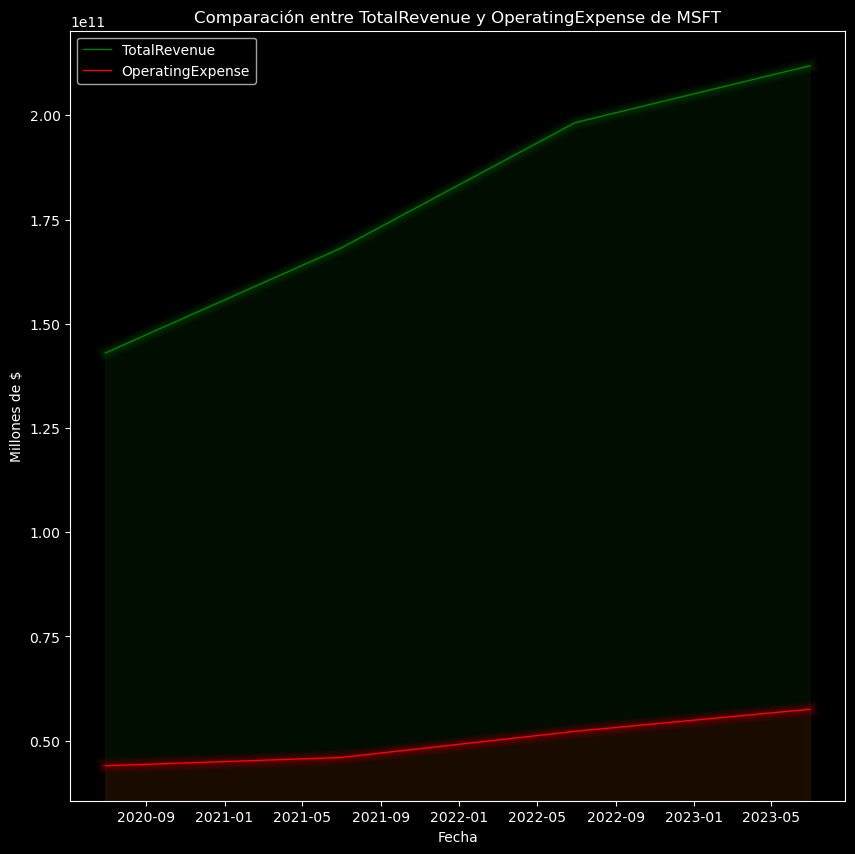

In [ ]:

plt.figure(figsize=(10,10))
sns.lineplot(data=data, x=data.index, y='TotalRevenue', color='green', linewidth=1, label='TotalRevenue')
sns.lineplot(data=data, x=data.index, y='OperatingExpense', color='red', linewidth=1, label='OperatingExpense')
#sns.lineplot(data=data, x=data.index, y='Volume', color='white', linewidth=1, label='Volume')
mplcyberpunk.add_glow_effects()
plt.title(f'Comparación entre TotalRevenue y OperatingExpense de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Millones de $')
plt.show()


In [ ]:
# show holders
msft.major_holders

,Breakdown,Unnamed: 1
0,0.05%,% of Shares Held by All Insider
1,73.68%,% of Shares Held by Institutions
2,73.72%,% of Float Held by Institutions
3,6867,Number of Institutions Holding Shares


In [ ]:
# show holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,667.99M,2024-03-31,0.0899,300447209136
1,Blackrock Inc.,546.02M,2024-03-31,0.0735,245588811514
2,State Street Corporation,300.35M,2024-03-31,0.0404,135093325652
3,"FMR, LLC",220.86M,2024-03-31,0.0297,99338273797
4,"Geode Capital Management, LLC",157.59M,2024-03-31,0.0212,70880235398
5,Price (T.Rowe) Associates Inc,142.2M,2024-03-31,0.0191,63959023026
6,JP Morgan Chase & Company,127.74M,2024-03-31,0.0172,57455415190
7,Morgan Stanley,122.19M,2024-03-31,0.0164,54957321784
8,Norges Bank Investment Management,95.52M,2023-12-31,0.0129,42963830620
9,Capital International Investors,83.57M,2024-03-31,0.0112,37588595762


In [ ]:
"""# show holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders"""

# show holders
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,233.56M,2024-03-31,0.0314,105049568077
1,Vanguard 500 Index Fund,187.25M,2024-03-31,0.0252,84222111226
2,Fidelity 500 Index Fund,89.99M,2024-04-30,0.0121,40477944243
3,SPDR S&P 500 ETF Trust,89.36M,2024-05-31,0.0120,40192582222
4,iShares Core S&P 500 ETF,76.52M,2024-04-30,0.0103,34418267467
5,Vanguard Growth Index Fund,69.83M,2024-03-31,0.0094,31410015596
6,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",54.14M,2024-04-30,0.0073,24352016580
7,Vanguard Institutional Index Fund-Institutiona...,48.87M,2024-03-31,0.0066,21978519430
8,Growth Fund Of America Inc,40.58M,2024-03-31,0.0055,18254022146
9,Vanguard Information Technology Index Fund,40.07M,2024-02-29,0.0054,18023117689


In [ ]:
'''# show recommendations
msft.recommendations

msft.recommendations_summary

msft.upgrades_downgrades

#YFNotImplementedError: Have not implemented fetching 'recommendations' from Yahoo API'''

"# show recommendations\nmsft.recommendations\n\nmsft.recommendations_summary\n\nmsft.upgrades_downgrades\n\n#YFNotImplementedError: Have not implemented fetching 'recommendations' from Yahoo API"

In [ ]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-04-23 16:00:00-04:00,NaN,NaN,NaN
2025-01-28 16:00:00-05:00,NaN,NaN,NaN
2024-12-06 11:00:00-05:00,NaN,NaN,NaN
2024-10-22 06:00:00-04:00,NaN,NaN,NaN
2024-07-23 06:00:00-04:00,2.93,NaN,NaN
2024-06-06 13:00:00-04:00,NaN,NaN,NaN
2024-05-29 13:00:00-04:00,NaN,NaN,NaN
2024-05-21 08:00:00-04:00,2.60,2.71,0.0423
2024-04-25 16:00:00-04:00,2.82,2.94,0.0432


In [ ]:
# show news
msft.news

[{'uuid': '9241ea18-d80f-39bf-8e2c-faa6562da2a2',
  'title': "Apple, Microsoft, or Nvidia: Which Will Be the World's Most Valuable Company a Year From Now?",
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/9241ea18-d80f-39bf-8e2c-faa6562da2a2/apple%2C-microsoft%2C-or-nvidia%3A.html',
  'providerPublishTime': 1719144900,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/xArq4iewyHTW655kjJcOBA--~B/aD00NzM7dz03MjA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/motleyfool.com/71b636669ff0dafab86b4ba9052cd0d3',
     'width': 720,
     'height': 473,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/WJIHeVpXFud2WVWrFm1Org--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/71b636669ff0dafab86b4ba9052cd0d3',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AAPL', 'NVDA', 'MSFT']},
 {'uuid': '8fc3d058-771e-3f7e-b544-17a

## Multiple tickers

In [ ]:
"""tickers = yf.Tickers('msft aapl goog')

# access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions"""

'tickers = yf.Tickers(\'msft aapl goog\')\n\n# access each ticker using (example)\ntickers.tickers[\'MSFT\'].info\ntickers.tickers[\'AAPL\'].history(period="1mo")\ntickers.tickers[\'GOOG\'].actions'

In [ ]:
data = yf.download("SPY AAPL", period="1mo")
data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2024-05-22  190.899994  528.126221  190.899994  529.830017  192.820007   
2024-05-23  186.880005  524.268677  186.880005  525.960022  191.000000   
2024-05-24  189.979996  527.737488  189.979996  529.440002  190.580002   
2024-05-28  189.990005  528.106262  189.990005  529.809998  193.000000   
2024-05-29  190.289993  524.408203  190.289993  526.099976  192.250000   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2024-05-22  531.380005  190.270004  527.599976  192.270004  530.650024   
2024-05-23  533.070007  186.630005  524.719971  190.979996  532.960022   
2024-05-24  530.270020  188.039993  526.880005  188.820007  527.849976   
2024-05-28  530.510010  189.100006  527.109985  191.509995  530.270020   
2024-05-29  527.309998  189.509995  525.369995  189.610001  525.679993   

              Volume            
                AAPL       SPY  
Date                            
2024-05-22  34648500  48390000  
2024-05-23  51005900  57211200  
2024-05-24  36294600  41258400  
2024-05-28  52280100  36269600  
2024-05-29  53068000  45190300

### Estilo

In [ ]:
plt.style.use("dark_background")

### Funciones principales

In [ ]:
import yfinance as yf

def get_data(stock, start_time, end_time):
    data = yf.download(stock, start=start_time, end=end_time)
    return data


In [ ]:
#es para obtener los niveles de fibonacci

def get_levels(dfvar):
    
    def isSupport(df,i):
        support = df['low'][i] < df['low'][i-1]  and df['low'][i] < df['low'][i+1] and df['low'][i+1] < df['low'][i+2] and df['low'][i-1] < df['low'][i-2]
        return support

    def isResistance(df,i):
        resistance = df['high'][i] > df['high'][i-1]  and df['high'][i] > df['high'][i+1] and df['high'][i+1] > df['high'][i+2] and df['high'][i-1] > df['high'][i-2]
        return resistance
    
    def isFarFromLevel(l, levels, s):
        level = np.sum([abs(1-x[0]) < s for x in levels])
        return level == 0
    
    df = dfvar.copy()
    df.rename(columns = {"High": "high", "Low": "low"}, inplace = True)
    s = np.mean(df["high"] - df["low"])
    levels = []
    for i in range(2, df.shape[0] - 2):
        if isSupport(df, i):
            levels.append((i, df["low"][i]))
        elif isResistance(df, i):
            levels.append((i, df["high"][i]))
            
    filter_levels = []
    for i in range(2, df.shape[0] - 2):
        if isSupport(df, i):
            l = df["low"][i]
            if isFarFromLevel(l, levels, s):
                filter_levels.append((i,l))
                
    return filter_levels
    

In [ ]:
def plot_close_price(data):
    
    
    levels = get_levels(data)
    df_levels = pd.DataFrame(levels, columns = ["index", "close"])
    df_levels.set_index("index", inplace = True)
    max_level = df_levels.idxmax()
    min_level = df_levels.idxmin()
    
    #ratios de fibonacci
    ratios = [0, 0.236, 0.328, 0.5, 0.618, 0.786, 1]
    
    #los ploteo
    # los ploteo
    if min_level.close > max_level.close:
        trend = "down"
        fib_levels = [data.Close.iloc[max_level.close] - (data.Close.iloc[max_level.close] - data.Close.iloc[min_level.close]) * ratio for ratio in ratios]
        idx_level = max_level
    else:
        trend = "up"
        fib_levels = [data.Close.iloc[min_level.close] + (data.Close.iloc[max_level.close] - data.Close.iloc[min_level.close]) * ratio for ratio in ratios]
        idx_level = min_level

        
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    logo = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    font = {"family":"sans-serif",
            "color": "white",
            "size": 16,
            }
    
    font_sub = {"family":"sans-serif",
                "color": "white",
                "weight": "normal",
                "size": 10,
                }
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(data.index, data.Close, color = "darkorange", linewidth = 1)
    mplcyberpunk.add_glow_effects()
    for level, ratio in zip(fib_levels, ratios):
        plt.hlines(level, xmin=data.index[0], xmax=data.index[-1], colors="snow", linestyles="dotted", linewidth=0.9, label="{:.1f}%".format(ratio*100))

        
        
    plt.ylabel("Precio USD")
    plt.xticks(rotation = 45, ha="right")
    ax = plt.gca()
    #ax.figure.figimage(logo, 10, 1000, alpha=.99, zorder=1)
    ax.figure.figimage(background, 40, 40, alpha=.15, zorder=1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewith=0.2)
    return fig
    
def daily_returns(df):
    df = df.sort_index(ascending=True)
    df["returns"] = np.log(df["Close"]).diff()
    return df

def returns_vol(df):
    df["volatility"] = df.returns.rolling(12).std()
    return df

def plot_volatility(df_vol):
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    logo = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    font = {"family":"sans-serif",
            "color": "white",
            "weight":"normal",
            "size":16,
            }
    
    font_sub = {"family":"sans-serif",
                "color":"white",
                "weight":"normal",
                "size":10
                }
    
    df_plot = df_vol.copy()
    fig = plt.figure(figsize=(10,6))
    plt.plot(df_plot.index, df_plot.returns, color= "darkorange", linewidth=0.5)
    plt.plot(df_plot.index, df_plot.volatility, color="darkorange", linewidth=1)
    mplcyberpunk.add_glow_effects()
    plt.ylabel("% Porcentaje")
    plt.xticks(rotation= 45, ha="right")
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.3f}"))
    # ax.figure.figimage(logo, 10, 100, alpha=.99, zorder=1)
    ax.figure.figimage(background, 40, 40, alpha = .15, zorder=1)
    ax.spines["top"].set.visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewidth=0.2)
    plt.legend(("Retornos Diarios", "Volatilidad Móvil"), frameon = False)
    return fig

def plot_prophet(data, n_forecast=365):
    data_prophet = data.reset_index().copy()
    data_prophet.rename(columns={"Date": "ds", "Close":"y"}, inplace=True)
    
    m = Prophet()
    m.fit(data_prophet[["ds", "y"]])
    
    future = m.make_future_dataframe(periods=n_forecast)
    forecast = m.predict(future)
    print(forecast.columns)
    fig1 = m.plot(forecast)
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    mplcyberpunk.add_glow_effects()
    ax = plt.gca()
    ax.figure.figimage(background, 40, 40, alpha=.15, zorder=1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewidth=0.4)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Precio de Cierre")
    plt.plot(forecast.ds, forecast.yhat, color="darkorange", linewidth=0.5)
    return fig1
    
    

### LAYOUT - Sidebar

In [ ]:

logo_pypro = Image.open("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
with st.sidebar:
    st.image(logo_pypro)
    stock = st.selectbox("Ticker", ["NVDA", "TSLA", "MSFT", "AMZN", "INTC", "AMD", "JNJ", "BABA", "GOOGL", "QCOM"])
    start_time = st.date_input(
        "Fecha de Inicio",
        datetime.date(2019, 7, 6))
    end_time = st.date_input(
        "Fecha Final",
        datetime.date(2023, 10, 6))
    periods = st.number_input("Periodos Forecast", value = 365, min_value=1, max_value=5000)
    

2024-06-23 16:27:37.131 
  command:

    streamlit run c:\Users\GAMM\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


### DATA - Funciones sobre inputs

[*********************100%***********************]  1 of 1 completed


ValueError: keyword grid_linewith is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

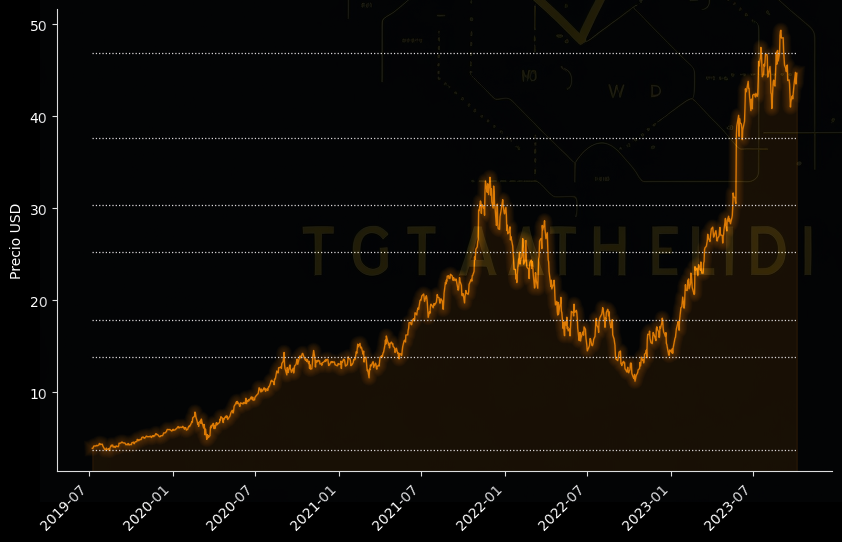

In [ ]:
data = get_data(stock, start_time.strftime("%Y-%m-%d"), end_time.strftime("%Y-%m-%d"))
plot_price = plot_close_price(data)

df_ret = daily_returns(data)
df_vol = returns_vol(df_ret)
plot_vol = plot_volatility(df_vol)

plot_forecast = plot_prophet(data, periods)

### LAYOUT - Render Final

In [ ]:
#nombre de la aplicación
st.title("Análisis de Acciones")

st.subheader( "Precio de Cierre - Fibonacci")

#el método de pyplot de streamlit siempre recibe una figura
st.pyplot("Forecast a Un Año - prophet")
st.pyplot(plot_forecast)

st.subheader("Retornos Diarios")
st.pyplot(plot_vol)

st.dataframe(data)

AttributeError: 'str' object has no attribute 'savefig'

In [ ]:
tikr = pd.read_csv('./datos/advanced-micro-devices-i.csv')
tikr

,DateTime,AMD Price Close,AMD Volume,OHLC (open),OHLC (high),OHLC (low),OHLC (close)
0,2005-01-03 00:00:00,21.41,9279700,22.110,22.30,21.25,21.41
1,2005-01-04 00:00:00,20.21,20380800,21.480,21.51,20.21,20.21
2,2005-01-05 00:00:00,19.75,19229800,20.320,20.61,19.52,19.75
3,2005-01-06 00:00:00,19.72,10759300,20.070,20.11,19.34,19.72
4,2005-01-07 00:00:00,19.92,16590700,19.910,20.20,19.15,19.92
...,...,...,...,...,...,...,...
4897,2024-06-18 00:00:00,154.63,51852033,156.990,157.24,153.34,154.63
4898,2024-06-20 00:00:00,161.78,93245732,155.825,166.82,155.50,161.78
4899,2024-06-21 00:00:00,161.23,61334699,161.750,163.20,157.89,161.23
4900,2024-06-24 00:00:00,160.25,45954054,159.750,163.40,158.19,160.25
